<a href="https://colab.research.google.com/github/RajeevBalakrishnan/TelecomChurn/blob/main/Telecom_Churn_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Telecom Churn Case Study


### Problem Statement

**Background:**
> In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. 
In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. 
Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. 


**Actual Problem definition:**

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. 

In [2]:

# Import all the necessary libraries

import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt


import sklearn.metrics

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [3]:

pd.set_option('display.max_columns',None)

pd.set_option('display.max_rows',None)


In [4]:

telecom=pd.read_csv('telecom_churn_data.csv')


In [5]:

telecom.head()


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4.0,

In [6]:

telecom.shape


(91405, 226)


#### Data Dictionary

LOC	Local calls - within same telecom circle
STD	STD calls - outside the calling circle
IC	Incoming calls
OG	Outgoing calls
T2T	Operator T to T, i.e. within same operator (mobile to mobile)
T2M    	Operator T to other operator mobile
T2O    	Operator T to other operator fixed line
T2F    	Operator T to fixed lines of T
T2C    	Operator T to it’s own call center
ARPU    	Average revenue per user
MOU    	Minutes of usage - voice calls
AON    	Age on network - number of days the customer is using the operator T network
ONNET   	All kind of calls within the same operator network
OFFNET    	All kind of calls outside the operator T network
ROAM	Indicates that customer is in roaming zone during the call
SPL   	Special calls
ISD    	ISD calls
RECH    	Recharge
NUM    	Number
AMT    	Amount in local currency
MAX    	Maximum
DATA    	Mobile internet
3G    	3G network
AV    	Average
VOL    	Mobile internet usage volume (in MB)
2G    	2G network
PCK    	Prepaid service schemes called - PACKS
NIGHT    	Scheme to use during specific night hours only
MONTHLY    	Service schemes with validity equivalent to a month
SACHET   	Service schemes with validity smaller than a month
*.6    	KPI for the month of June
*.7    	KPI for the month of July
*.8    	KPI for the month of August
*.9    	KPI for the month of September
FB_USER	Service scheme to avail services of Facebook and similar social networking sites
VBC    	Volume based cost - when no specific scheme is not purchased and paid as per usage





telecom.info(verbose = True,null_counts = True)


In [7]:
# Drop the most redundant columns

telecom.drop(['mobile_number','circle_id'],1,inplace=True)


> **In churn prediction, we assume that there are three phases of customer lifecycle :**
- The ‘good’ phase [Month 6 & 7]
- The ‘action’ phase [Month 8]
- The ‘churn’ phase [Month 9]

> In this case, since we are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.


# Filter High Value Customers

-  High-value customers : Those who have recharged with an amount more than or equal to 70th percentile of the average recharge amount in the first two months (the good phase)
> Let's derive features to extract high value customers
-  Let's find out total amount spent by customers on data recharge, we have two colums available to find this out 
> first column is av_rech_amt_data_x (x represents month here, would be either 6 or 7 or 8)
> second column is total_rech_data_x (x represnts month here, would be either 6 or 7 or 8)
- Let's introduce a new column total_rech_data_amt_x which can be calculated as av_rech_amt_data_x * total_rech_data_x


### Lets filter all the recharge columns and analyse


In [8]:

rech_cols=telecom.columns[telecom.columns.str.contains('rech_data|rech_amt')]

rech_cols


Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')

In [9]:
# Lets look for null values

telecom[rech_cols].isnull().mean()*100


total_rech_amt_6             0.001094
total_rech_amt_7             0.001094
total_rech_amt_8             0.001094
total_rech_amt_9             0.001094
max_rech_amt_6               0.001094
max_rech_amt_7               0.001094
max_rech_amt_8               0.001094
max_rech_amt_9               0.001094
date_of_last_rech_data_6    74.804442
date_of_last_rech_data_7    74.435753
date_of_last_rech_data_8    73.676495
date_of_last_rech_data_9    74.027679
total_rech_data_6           74.804442
total_rech_data_7           74.435753
total_rech_data_8           73.676495
total_rech_data_9           74.027679
max_rech_data_6             74.804442
max_rech_data_7             74.435753
max_rech_data_8             73.676495
max_rech_data_9             74.027679
av_rech_amt_data_6          74.804442
av_rech_amt_data_7          74.435753
av_rech_amt_data_8          73.676495
av_rech_amt_data_9          74.027679
dtype: float64

In [10]:

telecom[rech_cols].describe()


,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,91404.000000,91404.000000,91404.000000,91404.00000,91404.000000,91404.000000,91404.000000,91404.000000,23030.000000,23367.000000,24061.000000,23740.000000,23030.000000,23367.000000,24061.000000,23740.000000,23030.000000,23367.000000,24061.000000,23740.000000
mean,326.845368,321.955418,323.536125,302.99895,104.756969,104.603267,107.662673,101.958120,2.462875,2.669020,2.660114,2.445282,126.557403,126.693457,125.846598,124.792418,192.740912,200.904036,197.729259,192.582593
std,396.867614,409.003842,413.773725,404.21930,121.395283,124.662849,127.127896,125.638145,2.783406,3.031859,3.106441,2.534383,108.896203,109.940812,110.014194,111.262641,193.654619,195.714415,191.802108,187.052551
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000,1.000000
25%,110.000000,100.000000,90.000000,55.00000,30.000000,30.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.000000,82.000000,92.000000,89.000000,69.000000
50%,229.000000,220.000000,225.000000,200.00000,110.000000,110.000000,98.000000,61.000000,1.000000,2.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.000000,154.000000,154.000000,154.000000,164.000000
75%,436.000000,427.000000,434.000000,415.00000,120.000000,128.000000,144.000000,144.000000,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.000000,252.000000,252.000000,252.000000,252.000000
max,35190.000000,40335.000000,45320.000000,37235.00000,4010.000000,4010.000000,4449.000000,3399.000000,61.000000,50.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.000000,7546.000000,4365.000000,4076.000000,4061.000000


#### We can see that the missing count for 'date_of_last_rech_data_x' ,  'total_rech_data_x',   'max_rech_data_x' and  'av_rech_amt_data_x' have the same missing percentage. That means the user hasn't done any recharge for the period hence we can impute those with 0

In [11]:

telecom['total_rech_data_6']=telecom['total_rech_data_6'].fillna(0)
telecom['total_rech_data_7']=telecom['total_rech_data_7'].fillna(0)
telecom['total_rech_data_8']=telecom['total_rech_data_8'].fillna(0)
telecom['total_rech_data_9']=telecom['total_rech_data_9'].fillna(0)

In [12]:

telecom['date_of_last_rech_data_6']=telecom['date_of_last_rech_data_6'].fillna(0)
telecom['date_of_last_rech_data_7']=telecom['date_of_last_rech_data_7'].fillna(0)
telecom['date_of_last_rech_data_8']=telecom['date_of_last_rech_data_8'].fillna(0)
telecom['date_of_last_rech_data_9']=telecom['date_of_last_rech_data_9'].fillna(0)


In [13]:

telecom['max_rech_data_6']=telecom['max_rech_data_6'].fillna(0)
telecom['max_rech_data_7']=telecom['max_rech_data_7'].fillna(0)
telecom['max_rech_data_8']=telecom['max_rech_data_8'].fillna(0)
telecom['max_rech_data_9']=telecom['max_rech_data_9'].fillna(0)


In [14]:

telecom['av_rech_amt_data_6']=telecom['av_rech_amt_data_6'].fillna(0)
telecom['av_rech_amt_data_7']=telecom['av_rech_amt_data_7'].fillna(0)
telecom['av_rech_amt_data_8']=telecom['av_rech_amt_data_8'].fillna(0)
telecom['av_rech_amt_data_9']=telecom['av_rech_amt_data_9'].fillna(0)



#### There is no month wise total DATA recharge amount provided, hence we need to multiply the number of data recharges with the average recharge amount for that particular month


In [15]:

telecom['total_rech_data_amt_6'] = telecom['av_rech_amt_data_6'] * telecom['total_rech_data_6']

telecom['total_rech_data_amt_7'] = telecom['av_rech_amt_data_7'] * telecom['total_rech_data_7']

telecom['total_rech_data_amt_8'] = telecom['av_rech_amt_data_8'] * telecom['total_rech_data_8']

telecom['total_rech_data_amt_9'] = telecom['av_rech_amt_data_9'] * telecom['total_rech_data_9']



#### Now we can drop the abvoe columns to avoid multi collinearity


In [16]:

telecom.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
              'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)


#### Let's find out the average recharge done in the first two months(june & july) - The good phase

#### Total amount spend would be the sum of total data recharge done & total call/sms recharges


In [17]:

avg_rech_6n7 = (telecom['total_rech_amt_6'].fillna(0) 
+ telecom['total_rech_amt_7'].fillna(0) 
+ telecom['total_rech_data_amt_6'].fillna(0) 
+ telecom['total_rech_data_amt_7'].fillna(0))/2



#### Let's take 70 percentile of the calculated average amount


In [18]:

perc_70_6n7 = np.percentile(avg_rech_6n7, 70.0)

print("70 percentile is : ", perc_70_6n7)


70 percentile is :  477.0



### Filter the given data set for 70-th percentile, those will be the high valued customers of our interest.


In [19]:

telecom_hv_cust = telecom[avg_rech_6n7 >= perc_70_6n7]

print("Dimensions of the filtered dataset:",telecom_hv_cust.shape)


Dimensions of the filtered dataset: (27436, 220)


In [20]:
# Filter the 9th month columns for further analysis

month_9=list(filter(lambda x:'_9' in x,list(telecom_hv_cust.columns)))

month_9


['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'total_rech_dat

#### Now we need to figure out the target variable 'churn' value from the 9th month data , values would be either 1 (churn) or 0 (non-churn)

#### We will calculate churn/non-churn based on the 9th month usage as mentioned in the problem statement

In [21]:

telecom_hv_cust['churn'] = np.where(telecom_hv_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)

telecom_hv_cust.head()


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,churn
0,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,6/21/2014,7/16/2014,8/8/2014,9/28/


### Lets drop the 9-th month features, those are no longer needed for the analysis


In [22]:

telecom_hv_cust.drop(month_9,1,inplace=True)


In [23]:

telecom_hv_cust.shape


(27436, 168)

In [24]:
# lets find out churn/non churn percentage

telecom_hv_cust['churn'].value_counts(normalize=True)


0    0.918793
1    0.081207
Name: churn, dtype: float64

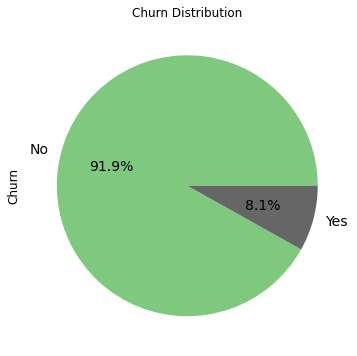

In [25]:

#Churn Distribution

pie_chart = telecom_hv_cust['churn'].value_counts()*100.0 /len(telecom_hv_cust)

ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14,cmap='Accent' )  

ax.set_ylabel('Churn',fontsize = 12)

ax.set_title('Churn Distribution', fontsize = 12)

plt.show()



#### There is significant data imbalance w.r.t. the target variable 'churn'. Hence we need to do some resampling before applying any models on the dataset



####  Let's check the columns with no variance in their values and drop such columns


In [26]:

drop_unique_cols=[]

for i in telecom_hv_cust.columns:
    if telecom_hv_cust[i].nunique() ==1:
        drop_unique_cols.append(i)
        
telecom_hv_cust.drop(drop_unique_cols,axis=1,inplace = True)

print('Dropped columns are: \n',drop_unique_cols)


Dropped columns are: 
 ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [27]:

telecom_hv_cust.shape


(27436, 156)


### Missing Value Treatment


In [28]:

missing=(telecom_hv_cust.isnull().mean()*100).sort_values(ascending=False)

missing


fb_user_8                   46.821694
arpu_2g_8                   46.821694
arpu_3g_8                   46.821694
night_pck_user_8            46.821694
count_rech_3g_8             46.821694
count_rech_2g_8             46.821694
night_pck_user_6            44.069835
arpu_3g_6                   44.069835
count_rech_3g_6             44.069835
fb_user_6                   44.069835
count_rech_2g_6             44.069835
arpu_2g_6                   44.069835
count_rech_2g_7             43.060213
arpu_2g_7                   43.060213
night_pck_user_7            43.060213
fb_user_7                   43.060213
count_rech_3g_7             43.060213
arpu_3g_7                   43.060213
std_og_mou_8                 3.878116
std_ic_mou_8                 3.878116
isd_og_mou_8                 3.878116
spl_og_mou_8                 3.878116
isd_ic_mou_8                 3.878116
og_others_8                  3.878116
ic_others_8                  3.878116
loc_ic_t2t_mou_8             3.878116
loc_ic_t2m_m


#### Will drop columns with missing values more than 30%


In [29]:
Drop_cols=missing[missing.values>30].index

Drop_cols=list(Drop_cols)

Drop_cols


['fb_user_8',
 'arpu_2g_8',
 'arpu_3g_8',
 'night_pck_user_8',
 'count_rech_3g_8',
 'count_rech_2g_8',
 'night_pck_user_6',
 'arpu_3g_6',
 'count_rech_3g_6',
 'fb_user_6',
 'count_rech_2g_6',
 'arpu_2g_6',
 'count_rech_2g_7',
 'arpu_2g_7',
 'night_pck_user_7',
 'fb_user_7',
 'count_rech_3g_7',
 'arpu_3g_7']

In [30]:
           
telecom_hv_cust.drop(Drop_cols,1,inplace=True)

telecom_hv_cust.shape


(27436, 138)

In [31]:

(telecom_hv_cust.isnull().mean()*100).sort_values(ascending=False)


std_ic_mou_8                3.878116
std_og_mou_8                3.878116
loc_og_t2f_mou_8            3.878116
loc_og_t2c_mou_8            3.878116
loc_og_mou_8                3.878116
std_og_t2t_mou_8            3.878116
std_og_t2m_mou_8            3.878116
std_og_t2f_mou_8            3.878116
std_ic_t2f_mou_8            3.878116
isd_og_mou_8                3.878116
loc_og_t2m_mou_8            3.878116
spl_og_mou_8                3.878116
std_ic_t2m_mou_8            3.878116
og_others_8                 3.878116
std_ic_t2t_mou_8            3.878116
loc_ic_t2t_mou_8            3.878116
loc_ic_mou_8                3.878116
loc_ic_t2m_mou_8            3.878116
spl_ic_mou_8                3.878116
loc_ic_t2f_mou_8            3.878116
onnet_mou_8                 3.878116
ic_others_8                 3.878116
isd_ic_mou_8                3.878116
offnet_mou_8                3.878116
roam_og_mou_8               3.878116
roam_ic_mou_8               3.878116
loc_og_t2t_mou_8            3.878116
d


**Analysis:** The remaining missing values are all in the Minutes of Usage columns and the maximum missing % is around 3.91 , that means, the customer has not used the particular call type, hence we can fill the missing values with zero.


In [32]:

telecom_hv_cust=telecom_hv_cust.fillna(0)


In [33]:

telecom_hv_cust.shape


(27436, 138)

In [34]:
# Filter the 9th month columns for further analysis

date_cols=list(filter(lambda x:'date' in x,list(telecom_hv_cust.columns)))

date_cols


['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [35]:
# We will drop all the date columns since this will not add any more values to the analysis

telecom_hv_cust.drop(date_cols,1,inplace=True)

telecom_hv_cust.shape


(27436, 132)

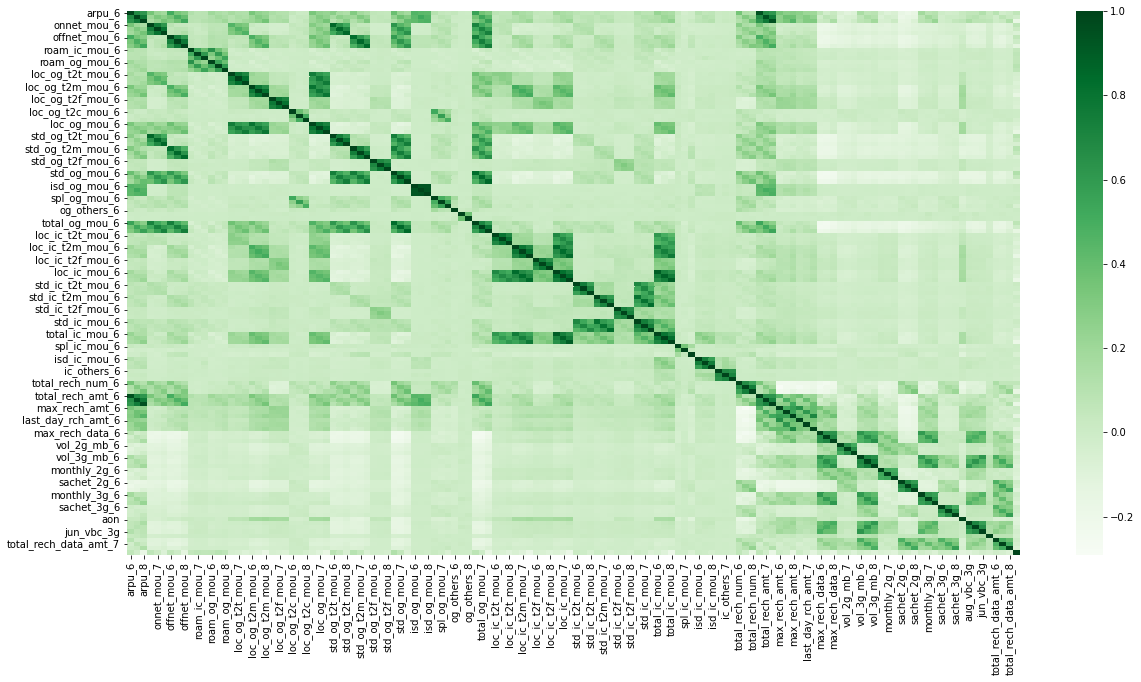

In [36]:
# Correlation heatmap

plt.figure(figsize=(20,10))

sns.heatmap(telecom_hv_cust.corr(),cmap='Greens')



#### Finding : There are some strong multicollinearity spotted


In [37]:

df = telecom_hv_cust.select_dtypes(include =[np.number])

df.shape


(27436, 132)


sns.pairplot(telecom_hv_cust)


In [38]:

# Lets do some analysis on tenure related variable 'aon', let's create a new dataframe 'tenure_data' for the purpose

tenure_data = telecom_hv_cust.copy()


In [39]:
plt.figure(figsize=(14,8))

# aon --> Age on network - number of days the customer is using the operator T network, we will convert this to months

tenure_data['tenure'] = tenure_data['aon']/30

tenure_data['tenure'].head()


0     32.266667
7     26.733333
8     10.500000
21    24.000000
23    20.133333
Name: tenure, dtype: float64

<Figure size 1008x576 with 0 Axes>

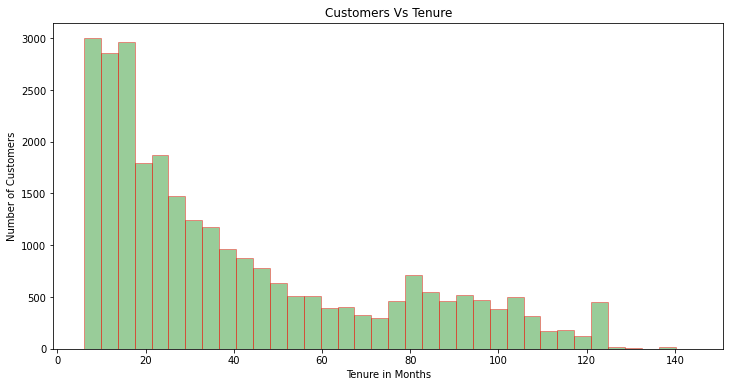

In [40]:

plt.figure(figsize=(12,6))

ax = sns.distplot(tenure_data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'Green',
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 4})

ax.set_ylabel('Number of Customers')

ax.set_xlabel('Tenure in Months')

ax.set_title('Customers Vs Tenure')

plt.show()


In [41]:
# We will do some variable transformation and binning for better understanding

tn_range = [0, 6, 12, 24, 60, 61]

tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']

tenure_data['tenure_range'] = pd.cut(tenure_data['tenure'], tn_range, labels=tn_label)

tenure_data['tenure_range'].head()


0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

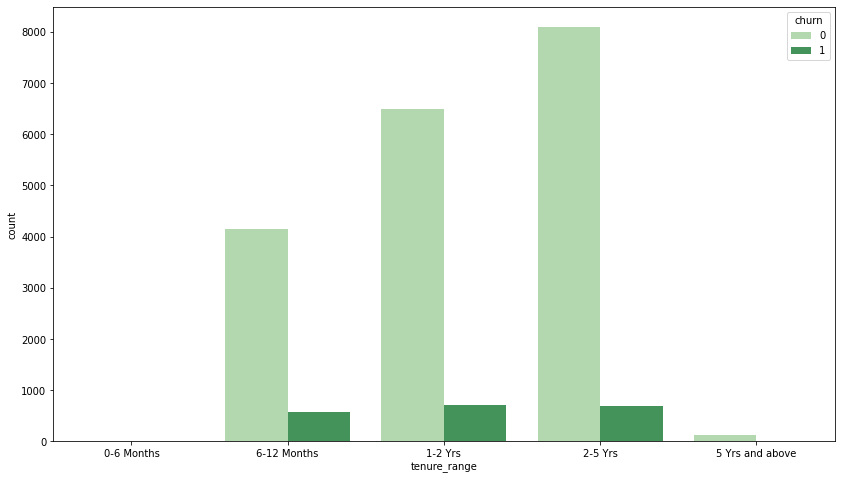

In [42]:

plt.figure(figsize=(14,8))

sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure_data,palette=("Greens"))

plt.show()


In [43]:
# Lets define a custom function to plot heatmaps

def heatmap(x,y,dataframe):
    
    plt.figure(figsize=(x,y))
    
    sns.heatmap(dataframe.corr(),cmap="Reds",annot=True)
    
    plt.show()
    

In [44]:

# Let's filter the columns for Minutes of Usage of Outgoing calls, for months 6,7 and 8

mou_og_cols = telecom_hv_cust.columns[telecom_hv_cust.columns.str.contains('.*_og_.*mou_',regex=True)]

mou_og_cols


Index(['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8'],
      dtype='object')

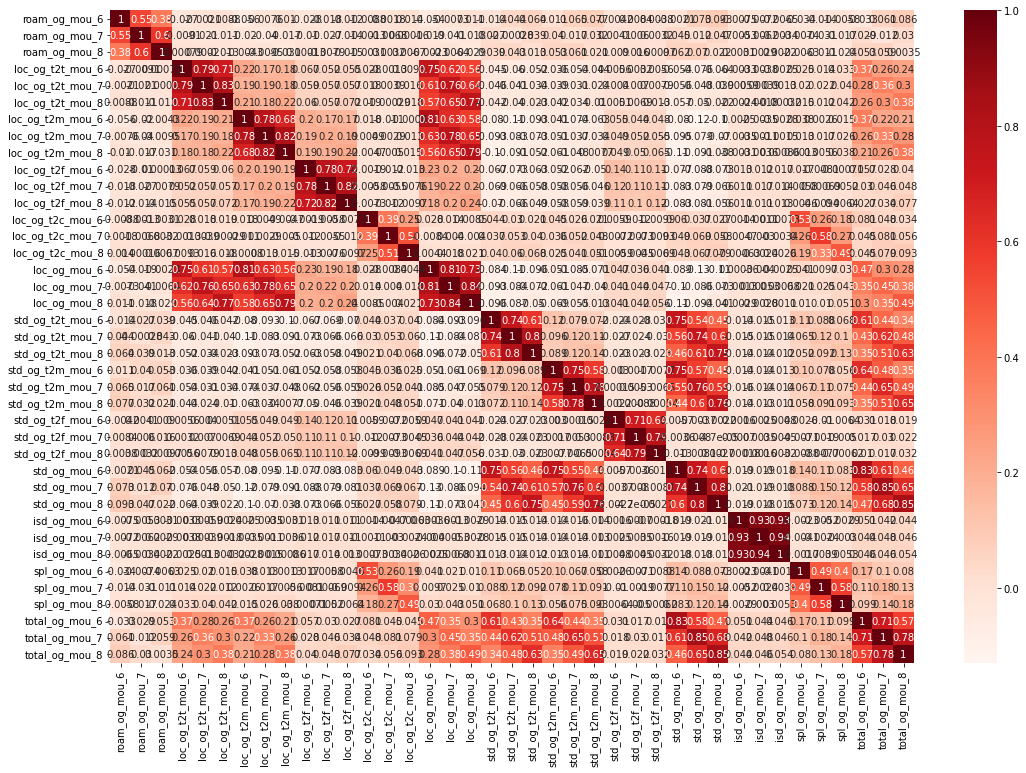

In [45]:

heatmap(18,12,telecom_hv_cust.filter(mou_og_cols))


#### Analysis: We can see that total_og_mou_x, std_og_mou_x and loc_og_mou_x seems to have strong correlation with other fileds and they needs to be inspected to avoid any multicolinearity issues.

In [46]:
# Let's filter the columns for Minutes of Usage of Outgoing calls, for month 6

mou_og_cols=list(telecom_hv_cust.columns[telecom_hv_cust.columns.str.contains('total_og_mou_|std_og_mou_|loc_og_mou_')])

mou_og_cols


['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']

In [47]:
#Let's drop the higly correlated outgoing minutes of usage columns

telecom_hv_cust.drop(mou_og_cols,1,inplace=True)


In [48]:

telecom_hv_cust.shape


(27436, 123)

In [49]:
# Let's filter the columns for Minutes of Usage of Outgoing calls, for months 6,7 and 8

mou_ic_cols = telecom_hv_cust.columns[telecom_hv_cust.columns.str.contains('.*_ic_.*mou_',regex=True)]

mou_ic_cols


Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8'],
      dtype='object')

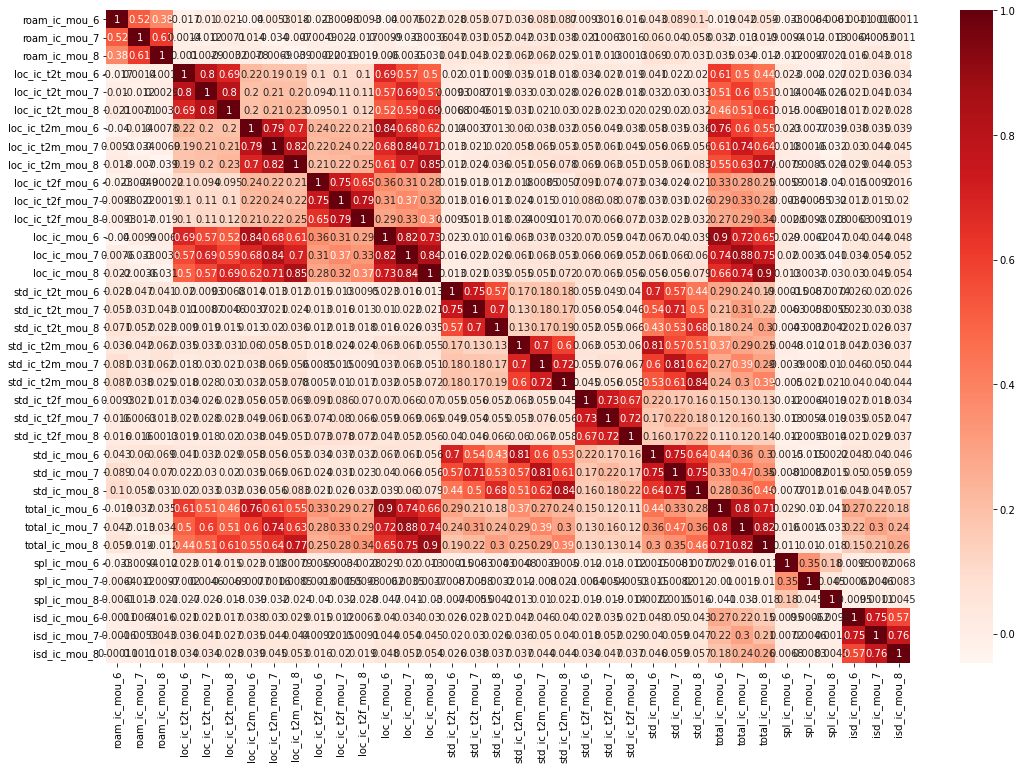

In [50]:

heatmap(18,12,telecom_hv_cust.filter(mou_ic_cols))



#### Analysis: We can see that total_ic_mou_x, std_ic_mou_x and loc_ic_mou_x seems to have strong correlation with other fileds and they needs to be inspected to avoid any multicolinearity issues.


In [51]:

mou_ic_cols=list(telecom_hv_cust.columns[telecom_hv_cust.columns.str.contains('total_ic_mou_|std_ic_mou_|loc_ic_mou_')])

mou_ic_cols


['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']

In [52]:
#Let's drop the higly correlated incoming minutes of usage columns

telecom_hv_cust.drop(mou_ic_cols,1,inplace=True)


In [53]:

telecom_hv_cust.shape


(27436, 114)

In [54]:
def plot_mean_bar_chart(df,columns_list):
    
    df_0 = df[df.churn==0].filter(columns_list)
    
    df_1 = df[df.churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0,color=['green','grey'])
    
    plt.show()
    
    return mean_bar


In [55]:
# create box plot for  6th, 7th and 8th month

def plot_box_chart(col):
    
    plt.figure(figsize=(20,16))
    
    df = telecom_hv_cust
    
    plt.subplot(2,3,1)
    
    sns.boxplot(data=telecom_hv_cust, y=col+"_6",x="churn",hue="churn",
                showfliers=False,palette=("Greens"))
    
    plt.subplot(2,3,2)
    
    sns.boxplot(data=telecom_hv_cust, y=col+"_7",x="churn",hue="churn",
                
                showfliers=False,palette=("Greens"))
    plt.subplot(2,3,3)
    
    sns.boxplot(data=telecom_hv_cust, y=col+"_8",x="churn",hue="churn",
                showfliers=False,palette=("Greens"))
    plt.show()

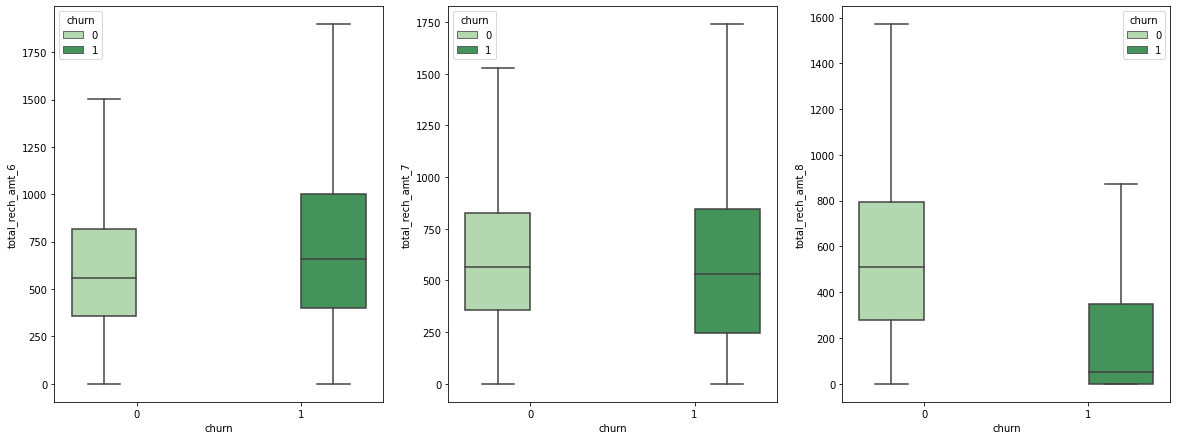

In [56]:
# Ploting Total recharge amount:

plot_box_chart('total_rech_amt')



#### Finding : We can see a drop in the total recharge amount for churned customers in the 8th Month (Action Phase).


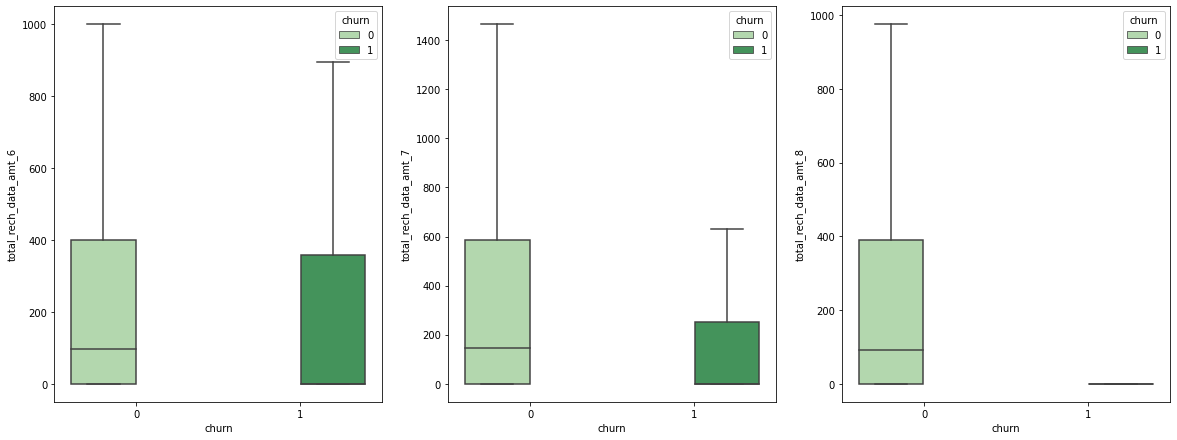

In [57]:
# Ploting for total recharge amount for data:

plot_box_chart('total_rech_data_amt')


#### Finding : We can see that there is a huge drop(nrgligibly less) in total recharge amount for data in the 8th month (action phase) for churned customers.

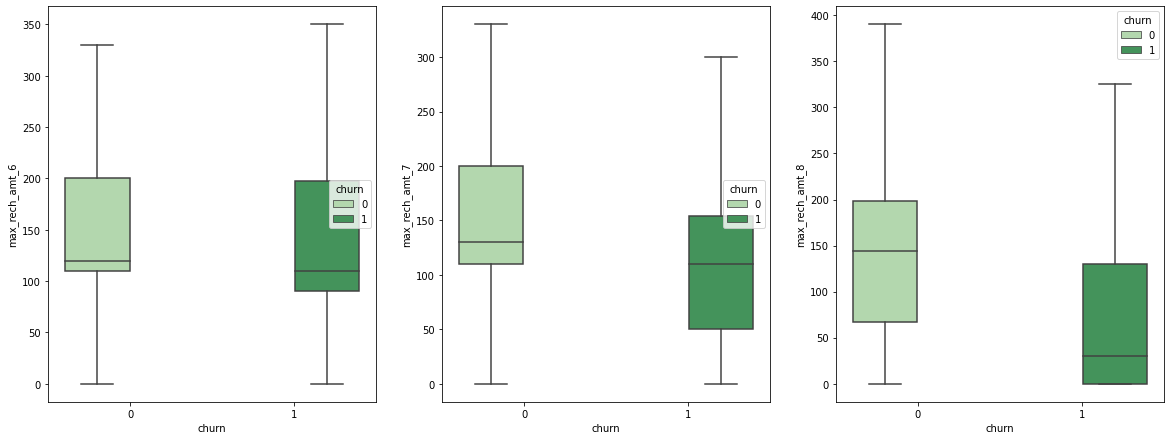

In [58]:
# Ploting for Maximum recharge amount for data:

plot_box_chart('max_rech_amt')



#### Finding : We can see the drop for max_rech_amt in the 8th month


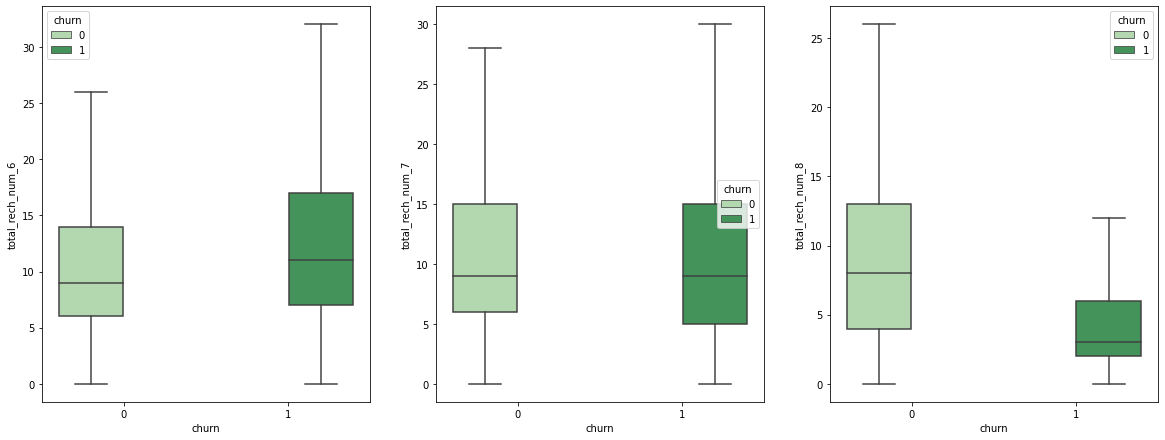

In [59]:
# # Ploting for Total number of rechargs

plot_box_chart('total_rech_num')



#### Finding : We can see the drop for total_rech_num in the 8th month


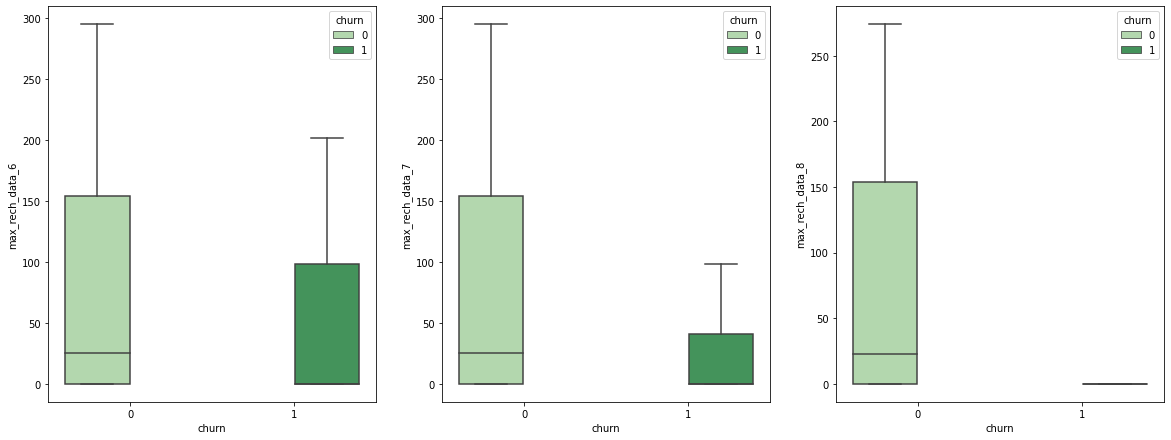

In [60]:
# # Ploting for Maximum recharge data

plot_box_chart('max_rech_data')



#### Finding :We can see that there is a huge drop in maximum data recharge in the 8th month (action phase) for churned customers.


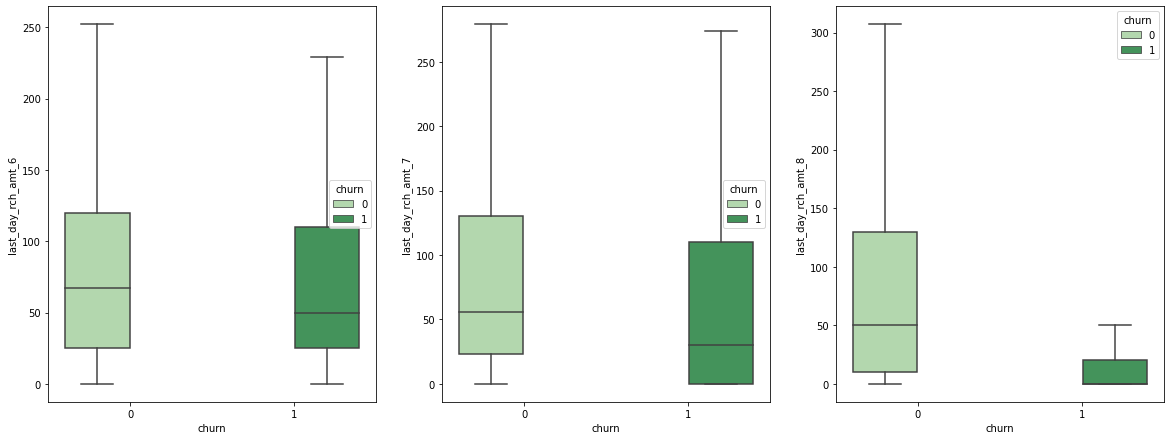

In [61]:
# Ploting for last day recharge amount:

plot_box_chart('last_day_rch_amt')


#### Finding :We can see that there is a huge drop in last day recharge amount in the 8th month (action phase) for churned customers.


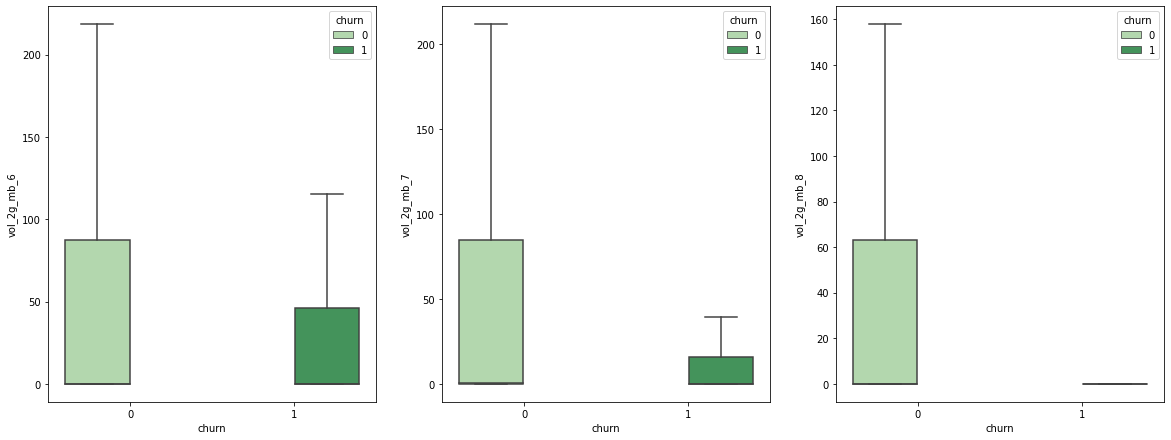

In [62]:
# Ploting for volume of 2G usage columns:

plot_box_chart('vol_2g_mb')


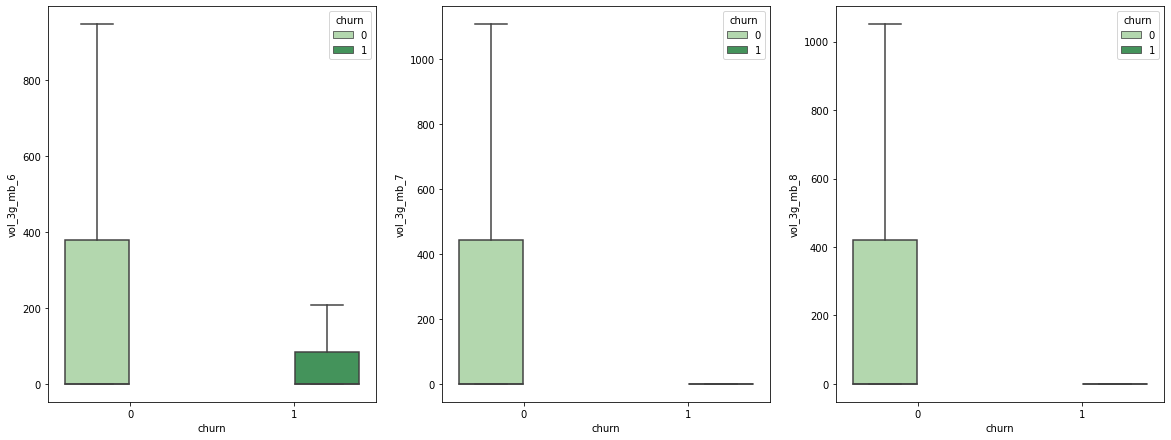

In [63]:
# Ploting for volume of 3G usage columns:

plot_box_chart('vol_3g_mb')



-  #### We have two observations from above: 2G and 3G usage for churned customers dropped in the 8th month
-  #### Also 2G/3G usage is higher for non-churned customers.


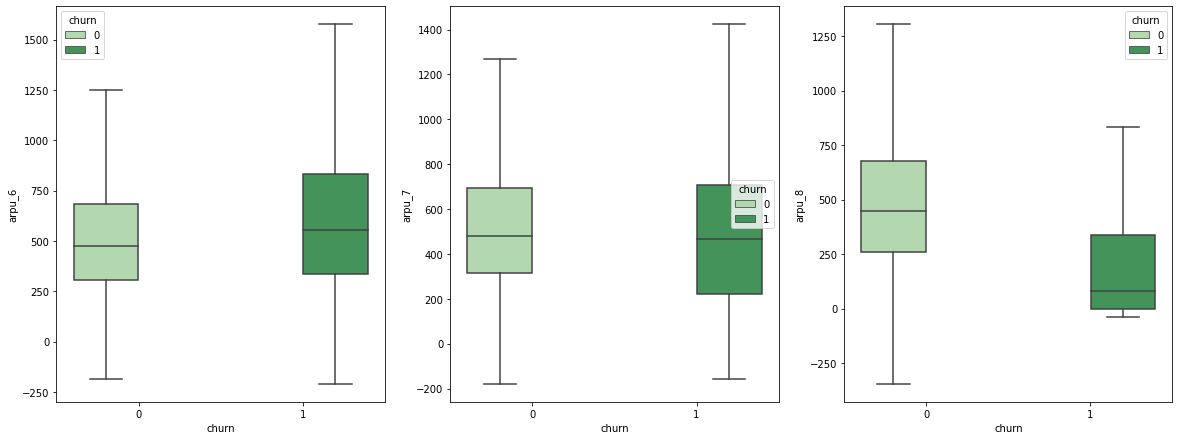

In [64]:
# Plotting average Revenue Per User

plot_box_chart('arpu')


#### We can see that huge drops for Average revenue per user in 8th month for churned customers

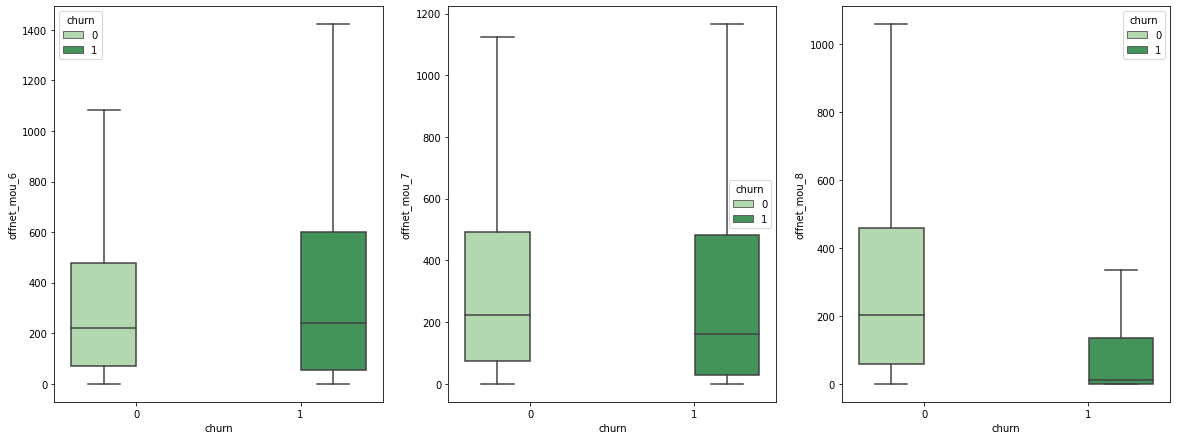

In [65]:
# Offnet Minutes of Usage for churned and non churned customers (OFFNET : All kind of calls outside the same operator network)

plot_box_chart('offnet_mou')


#### Finding : We can see the drop for Offnet minutes of usage services in the 8th month

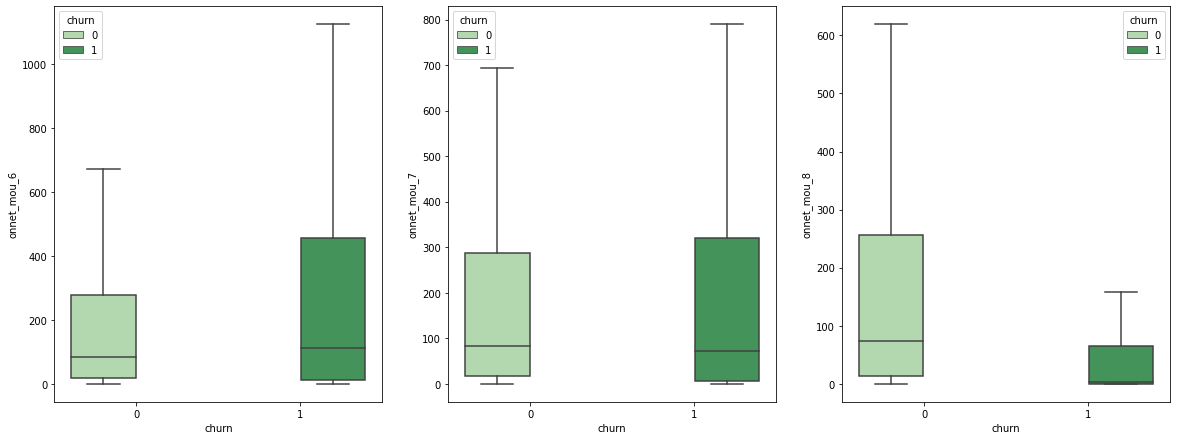

In [66]:
# Plotting Onnet Minutes of Usage for churned and non churned customers

plot_box_chart('onnet_mou')



#### Finding : We can see the drop for onnet minutes of usage services in the 8th month


In [67]:

monthly_subcription_2g_3g = telecom_hv_cust.columns[telecom_hv_cust.columns.str.contains('monthly_2g|monthly_3g',regex=True)]

monthly_subcription_2g_3g.tolist()


['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

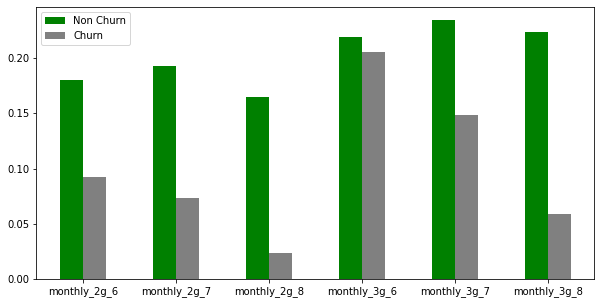

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.180419,0.192677,0.164591,0.218780,0.234529,0.224016
Churn,0.092011,0.073160,0.023339,0.205117,0.148564,0.058348


In [68]:

plot_mean_bar_chart(telecom_hv_cust, monthly_subcription_2g_3g)



#### Analysis: We can see a drop in monthly subscription for churned customers in the 8th Month


In [69]:

vbc_column = telecom_hv_cust.columns[telecom_hv_cust.columns.str.contains('vbc_3g',regex=True)]

vbc_column.tolist()


['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']

In [70]:
# Renaming month named vbc columns to 6,7,8,9 format

telecom_hv_cust.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [71]:
# Dropping 9th month 

telecom_hv_cust.drop('vbc_3g_9',1,inplace=True)


In [72]:

vbc_column = telecom_hv_cust.columns[telecom_hv_cust.columns.str.contains('vbc_3g',regex=True)]

vbc_column.tolist()


['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

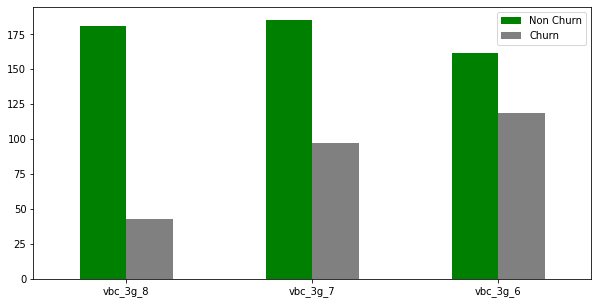

,vbc_3g_8,vbc_3g_7,vbc_3g_6
Non Churn,181.022110,185.317732,161.904787
Churn,43.099874,97.481441,118.686364


In [73]:

plot_mean_bar_chart(telecom_hv_cust, vbc_column)



#### Analysis - Volume based cost for 3G is much lower for Churned customers as compared to Non-Churned Customers and also there is a drop in vbc in the 8th month


In [74]:
# Checking Service schemes with validity smaller than a month for 2G/3G

SC_2g_or_3g_col = telecom_hv_cust.columns[telecom_hv_cust.columns.str.contains('sachet_2g|sachet_3g',regex=True)]


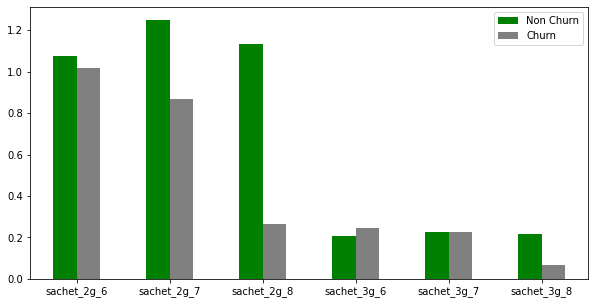

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8
Non Churn,1.074976,1.248770,1.131427,0.205649,0.228539,0.218383
Churn,1.017504,0.867145,0.263465,0.244614,0.224417,0.067325


In [75]:

plot_mean_bar_chart(telecom_hv_cust, SC_2g_or_3g_col)


#### Analysis : We can see the drop in sachet services in 8th month for churned cutsomers

In [76]:

telecom_hv_cust.shape


(27436, 113)

In [77]:

cor_matrix = telecom_hv_cust.corr().abs()

print(cor_matrix)

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.6)]

# we will drop the columns with high correlation (+/- 60%)
                 
telecom_hv_cust.drop(to_drop, axis=1, inplace=True)

print('Dropped columns which have high correlation are :',to_drop )


                         arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6                 1.000000  0.680571  0.625440     0.344942     0.217623   
arpu_7                 0.680571  1.000000  0.765935     0.208982     0.319521   
arpu_8                 0.625440  0.765935  1.000000     0.153326     0.238298   
onnet_mou_6            0.344942  0.208982  0.153326     1.000000     0.747954   
onnet_mou_7            0.217623  0.319521  0.238298     0.747954     1.000000   
onnet_mou_8            0.187339  0.268066  0.353169     0.619120     0.806204   
offnet_mou_6           0.510422  0.348637  0.281326     0.091404     0.056212   
offnet_mou_7           0.340192  0.486200  0.379435     0.039926     0.087036   
offnet_mou_8           0.291069  0.397265  0.532336     0.038007     0.080386   
roam_ic_mou_6          0.127682  0.091582  0.088358     0.024602     0.039716   
roam_ic_mou_7          0.085468  0.092589  0.079463     0.024055     0.008677   
roam_ic_mou_8          0.089

In [78]:

telecom_hv_cust.shape


(27436, 49)

In [79]:

telecom_hv_cust.columns


Index(['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_t2f_mou_6',
       'isd_og_mou_6', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_data_6',
       'vol_2g_mb_6', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6', 'aon',
       'total_rech_data_amt_6', 'total_rech_data_amt_7',
       'total_rech_data_amt_8', 'churn'],
      dtype='object')

In [80]:

# lets create X & y dataset for model building, X will obviously not have "churn" and y will only have "churn"

X = telecom_hv_cust.drop(['churn'], axis=1)

y = telecom_hv_cust['churn']

telecom_hv_cust.drop('churn', axis=1, inplace=True)


In [81]:
# split the dateset into train and test datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

print("Dimension of X_train:", X_train.shape)

print("Dimension of X_test:", X_test.shape)


Dimension of X_train: (19205, 48)
Dimension of X_test: (8231, 48)



## Scale the dataset


In [82]:

# Apply scaling on the dataset

from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [83]:

cols=X_train.columns

X_train[cols]= scaler.fit_transform(X_train[cols])

X_test[cols]=scaler.transform(X_test[cols])


In [84]:

# As discussed earlier, given dataset is skewed, lets balance the dataset

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_tr,y_tr = sm.fit_resample(X_train,y_train)


In [85]:

X_tr.shape


(35320, 48)

In [86]:

print("Imbalance in Training dataset after SMOTE :",(y_tr != 0).sum()/(y_tr == 0).sum())


Imbalance in Training dataset after SMOTE : 1.0


# Model Building


## Logistic Regression


In [87]:

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,plot_roc_curve,f1_score,precision_score,recall_score

lr = LogisticRegression(random_state=42)

lr.fit(X_train,y_train)

# Prediction on train set

y_pred_train=lr.predict(X_train)

acc=accuracy_score(y_train, y_pred_train)

f_1=f1_score(y_train, y_pred_train)

prec=precision_score(y_train, y_pred_train)

rec=recall_score(y_train, y_pred_train)


In [88]:

print('Accuracy of LR without balancing on train data',acc,'\n')

print('F1 Score of LR without balancing on train data',f_1,'\n')

print('Precision Score of LR without balancing on train data',prec,'\n')

print('Recall Score of LR without balancing on train data',rec)


Accuracy of LR without balancing on train data 0.9210622233793283 

F1 Score of LR without balancing on train data 0.0965435041716329 

Precision Score of LR without balancing on train data 0.6090225563909775 

Recall Score of LR without balancing on train data 0.05242718446601942


In [89]:
# Prediction on test set

y_pred_test = lr.predict(X_test)

test_acc=accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7548
           1       0.66      0.06      0.12       683

    accuracy                           0.92      8231
   macro avg       0.79      0.53      0.54      8231
weighted avg       0.90      0.92      0.89      8231



In [90]:

print('Accuracy of LR without balancing on test data',accuracy_score(y_test, y_pred_test),'\n')


Accuracy of LR without balancing on test data 0.9195723484388288 



In [91]:
# Let's create a dataframe to store the model scores

metric_df_final=pd.DataFrame({'Model':'LR w/o Balancing','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])



## Logistic Regression with balanced class_weight


In [92]:


from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,plot_roc_curve

lr = random_state=42, class_weight='balanced')

lr.fit(X_train,y_train)

y_pred_train=lr.predict(X_train)

acc=accuracy_score(y_train, y_pred_train)

f_1=f1_score(y_train, y_pred_train)

prec=precision_score(y_train, y_pred_train)

rec=recall_score(y_train, y_pred_train)


#### Since out target variable is higly inbalanced, a high accuracy is not a good indicator of the model performance, hence we need to apply some data balancing technique

In [93]:

print('Accuracy of LR with weighted class balancing on train data',acc,'\n')

print('F1 Score of LR with weighted class balancing on train data',f_1,'\n')

print('Precision Score of LR with weighted class balancing on train data',prec,'\n')

print('Recall Score of LR with weighted class balancing on train data',rec)


Accuracy of LR with weighted class balancing on train data 0.7116375943764645 

F1 Score of LR with weighted class balancing on train data 0.3087868197703445 

Precision Score of LR with weighted class balancing on train data 0.1912788000618525 

Recall Score of LR with weighted class balancing on train data 0.8006472491909385


In [94]:

# Prediction on test set

y_pred_test = lr.predict(X_test)

test_acc=accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.98      0.70      0.81      7548
           1       0.19      0.81      0.31       683

    accuracy                           0.71      8231
   macro avg       0.58      0.75      0.56      8231
weighted avg       0.91      0.71      0.77      8231



In [95]:

print('Accuracy of LR with weighted class balancing on test data',test_acc)


Accuracy of LR with weighted class balancing on test data 0.7050176163285141


In [96]:

metric_df=pd.DataFrame({'Model':'LR w.Class Balancing','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)



## Logistic Regression with SMOTE


In [97]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,plot_roc_curve

lr = LogisticRegression()

# Using Balanced dataset using SMOTE

X_tr,y_tr = sm.fit_resample(X_train,y_train)

lr.fit(X_tr,y_tr)

LogisticRegression()

In [98]:

# Prediction on train set

y_pred_train=lr.predict(X_tr)

acc=accuracy_score(y_tr, y_pred_train)

f_1=f1_score(y_tr, y_pred_train)

prec=precision_score(y_tr, y_pred_train)

rec=recall_score(y_tr, y_pred_train)

In [99]:

print('Accuracy of LR with SMOTE balancing on train data',acc,'\n')

print('F1 Score of LR with SMOTE balancing on train data',f_1,'\n')

print('Precision Score of LR with SMOTE balancing on train data',prec,'\n')

print('Recall Score of LR with SMOTE balancing on train data',rec)


Accuracy of LR with SMOTE balancing on train data 0.7652887882219706 

F1 Score of LR with SMOTE balancing on train data 0.7776883883078574 

Precision Score of LR with SMOTE balancing on train data 0.738665308201732 

Recall Score of LR with SMOTE balancing on train data 0.8210645526613817


In [100]:
#Prediction on test set

y_pred_test=lr.predict(X_test)

test_acc=accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.98      0.70      0.82      7548
           1       0.20      0.80      0.32       683

    accuracy                           0.71      8231
   macro avg       0.59      0.75      0.57      8231
weighted avg       0.91      0.71      0.78      8231



In [101]:

print('Accuracy of LR with SMOTE balancing on test data',test_acc)


Accuracy of LR with SMOTE balancing on test data 0.7110922123678776


In [102]:

metric_df=pd.DataFrame({'Model':'LR w.SMOTE Balancing','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)


In [103]:
# Logistic regression model - GLM(Generalized Linear Model)

import statsmodels.api as sm

logm1 = sm.GLM(y_tr,(sm.add_constant(X_tr)), family = sm.families.Binomial())

res=logm1.fit()

res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                35320
Model:                            GLM   Df Residuals:                    35271
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18098.
Date:                Mon, 12 Dec 2022   Deviance:                       36196.
Time:                        17:47:04   Pearson chi2:                 1.67e+11
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.1958      0.026    -46.384      0.000      -1.246      -1.145
arpu_6                    0.2754      0.033      8.330      0.000       0.211       0.340
onnet_mou_6               0.0255      0.018      1.422      0.155      -0.010       0.061
offnet_mou_6              0.0347      0.019      1.872      0.061      -0.002       0.071
roam_ic_mou_6            -0.0961      0.016     -5.910      0.000      -0.128      -0.064
roam_ic_mou_7             0.1393      0.020      6.946      0.000       0.100       0.179
roam_og_mou_7             0.1027      0.017      6.111      0.000       0.070       0.136
roam_og_mou_8             0.0920      0.017      5.362      0.000       0.058       0.126
loc_og_t2t_mou_6         -0.1659      0.020     -8.273      0.000      -0.205      -0.127
loc_og_t2m_mou_6         -0.2070      0.019    -10.664      0.000      -0.245      -0.169
loc_og_t2f_mou_6         -0.2232      0.026     -8.436      0.000      -0.275      -0.171
loc_og_t2c_mou_6         -0.1713      0.021     -8.013      0.000      -0.213      -0.129
loc_og_t2c_mou_7         -0.0493      0.024     -2.057      0.040      -0.096      -0.002
loc_og_t2c_mou_8          0.3606      0.031     11.712      0.000       0.300       0.421
std_og_t2f_mou_6         -0.0611      0.020     -3.122      0.002      -0.100      -0.023
isd_og_mou_6             -0.0509      0.021     -2.450      0.014      -0.092      -0.010
spl_og_mou_6              0.1939      0.024      8.156      0.000       0.147       0.241
spl_og_mou_7              0.1548      0.027      5.677      0.000       0.101       0.208
spl_og_mou_8             -1.2066      0.052    -23.238      0.000      -1.308      -1.105
og_others_6              -0.0256      0.020     -1.295      0.195      -0.064       0.013
og_others_7              -0.0121      0.038     -0.316      0.752      -0.087       0.063
og_others_8              -1.3469      0.413     -3.258      0.001      -2.157      -0.537
loc_ic_t2t_mou_6         -0.1243      0.021     -5.904      0.000      -0.166      -0.083
loc_ic_t2m_mou_6         -0.0257      0.017     -1.484      0.138      -0.060       0.008
loc_ic_t2f_mou_6         -0.1720      0.025     -6.777      0.000      -0.222      -0.122
std_ic_t2t_mou_6          0.0355      0.013      2.840      0.005       0.011       0.060
std_ic_t2m_mou_6         -0.0327      0.014     -2.395      0.017      -0.060      -0.006
std_ic_t2f_mou_6         -0.1152      0.028     -4.186      0.000      -0.169      -0.061
spl_ic_mou_6             -0.0407      0.020     -2.037      0.042      -0.080      -0.002
spl_ic_mou_7             -0.1551      0.036     -4.300      0.000      -0.226      -0.084
spl_ic_mou_8             -0.4266      0.025    -17.015      0.000      -0.476      -0.377
isd_ic_mou_6           

In [104]:

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

from sklearn.feature_selection import RFE

rfe = RFE(logreg,n_features_to_select=30)             # running RFE with 30 variables as output

rfe = rfe.fit(X_tr,y_tr)
         

In [105]:

# Create a datframe to view the RFE output with the selected variables and their respective ranking

rfe_leads_df = pd.DataFrame({'Predictor': X_tr.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})

rfe_leads_df.sort_values(by='Ranking')


,Predictor,Select Status,Ranking
0,arpu_6,True,1
21,loc_ic_t2t_mou_6,True,1
46,total_rech_data_amt_7,True,1
26,std_ic_t2f_mou_6,True,1
28,spl_ic_mou_7,True,1
29,spl_ic_mou_8,True,1
31,ic_others_6,True,1
20,og_others_8,True,1
33,max_rech_amt_6,True,1
35,max_rech_amt_8,True,1


In [106]:

# Apply GLM model to the RFE selected features

rfe_cols = X_tr.columns[rfe.support_]


In [107]:

X_tr_sm = sm.add_constant(X_tr[rfe_cols])

X_tr_sm.head()


,const,arpu_6,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2f_mou_6,std_ic_t2f_mou_6,spl_ic_mou_7,spl_ic_mou_8,ic_others_6,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_data_6,monthly_2g_7,monthly_2g_8,sachet_3g_6,aon,total_rech_data_amt_7,total_rech_data_amt_8
0,1.0,-0.699511,0.279160,0.508320,0.376667,0.742507,-0.364976,-0.522034,-0.245055,0.109533,-0.237856,-0.210889,-0.366608,-0.139516,-0.027718,-0.387449,-0.214045,-0.128482,-0.09956,-0.236391,-0.085353,-0.329462,0.433867,-0.173847,-0.686112,-0.405501,-0.373937,-0.212130,-0.111091,-0.380781,-0.274099
1,1.0,0.628076,-0.217892,-0.165242,-0.209788,-0.192448,4.542402,0.159731,-0.115248,5.356257,-0.237856,2.979253,0.308955,1.324701,-0.027718,0.959893,0.108912,-0.013850,-0.09956,-0.236391,0.605705,-0.227316,-0.279637,-0.035575,-0.464263,-0.405501,2.083786,-0.212130,-0.766800,0.617071,0.998418
2,1.0,-0.151497,-0.217892,-0.165242,-0.209788,-0.192448,-0.345526,0.146742,-0.117706,-0.253557,-0.237856,0.569319,-0.103429,-0.323710,-0.027718,-0.385895,-0.293324,-0.102387,-0.09956,-0.236391,-0.085353,0.465007,0.433867,0.229445,0.600613,-0.405501,-0.373937,-0.212130,-0.537146,-0.275323,-0.187391
3,1.0,-0.448655,-0.217892,-0.165242,-0.209788,-0.192448,-0.321930,-0.406965,-0.142291,-0.253557,-0.237856,-0.200818,-0.359873,-0.323219,-0.027718,-0.094343,-0.302295,-0.128482,-0.09956,-0.236391,-0.085353,-0.442958,-0.663831,-0.865203,-0.322279,-0.405501,-0.373937,1.808680,-0.341784,0.273786,-0.274099
4,1.0,-0.314794,0.253996,-0.165242,-0.209788,-0.192448,-0.028014,-0.463424,-0.266690,-0.063367,-0.237856,-0.276054,-0.366608,-0.282942,-0.027718,-0.138521,-0.322741,-0.128482,-0.09956,-0.236391,-0.085353,-0.329462,-0.663831,-0.749977,-0.464263,-0.405501,-0.373937,0.798275,-0.911244,0.782894,0.264090


In [108]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF for multicollinearity among variables

def fetch_vif_df(local_df):
    
    vif_df = pd.DataFrame()
    
    vif_df['Features'] = local_df.columns
    
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    
    vif_df = vif_df.reset_index(drop=True)
    
    return vif_df


In [109]:

logm2 = sm.GLM(y_tr,X_tr_sm, family = sm.families.Binomial())

res=logm2.fit()

res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                35320
Model:                            GLM   Df Residuals:                    35289
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18137.
Date:                Mon, 12 Dec 2022   Deviance:                       36275.
Time:                        17:47:14   Pearson chi2:                 7.89e+10
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.1885      0.026    -46.305      0.000      -1.239      -1.138
arpu_6                    0.2831      0.020     14.410      0.000       0.245       0.322
roam_ic_mou_6            -0.0937      0.016     -5.825      0.000      -0.125      -0.062
roam_ic_mou_7             0.1371      0.020      6.882      0.000       0.098       0.176
roam_og_mou_7             0.1050      0.017      6.248      0.000       0.072       0.138
roam_og_mou_8             0.0927      0.017      5.408      0.000       0.059       0.126
loc_og_t2t_mou_6         -0.1555      0.019     -8.181      0.000      -0.193      -0.118
loc_og_t2m_mou_6         -0.2160      0.017    -12.969      0.000      -0.249      -0.183
loc_og_t2f_mou_6         -0.2369      0.026     -8.948      0.000      -0.289      -0.185
loc_og_t2c_mou_6         -0.1864      0.020     -9.365      0.000      -0.225      -0.147
loc_og_t2c_mou_8          0.3329      0.028     12.043      0.000       0.279       0.387
spl_og_mou_6              0.2044      0.023      8.946      0.000       0.160       0.249
spl_og_mou_7              0.1155      0.020      5.776      0.000       0.076       0.155
spl_og_mou_8             -1.1775      0.050    -23.572      0.000      -1.275      -1.080
og_others_8              -1.3554      0.414     -3.277      0.001      -2.166      -0.545
loc_ic_t2t_mou_6         -0.1322      0.021     -6.368      0.000      -0.173      -0.091
loc_ic_t2f_mou_6         -0.1768      0.025     -7.079      0.000      -0.226      -0.128
std_ic_t2f_mou_6         -0.1333      0.028     -4.825      0.000      -0.187      -0.079
spl_ic_mou_7             -0.1757      0.035     -4.993      0.000      -0.245      -0.107
spl_ic_mou_8             -0.4325      0.025    -17.393      0.000      -0.481      -0.384
ic_others_6              -0.0783      0.030     -2.621      0.009      -0.137      -0.020
max_rech_amt_6            0.2657      0.022     11.910      0.000       0.222       0.309
max_rech_amt_7            0.1921      0.018     10.872      0.000       0.157       0.227
max_rech_amt_8           -0.8576      0.025    -34.247      0.000      -0.907      -0.809
max_rech_data_6           0.0667      0.017      3.968      0.000       0.034       0.100
monthly_2g_7             -0.1943      0.020     -9.721      0.000      -0.233      -0.155
monthly_2g_8             -0.5179      0.029    -17.797      0.000      -0.575      -0.461
sachet_3g_6               0.1505      0.017      8.758      0.000       0.117       0.184
aon                      -0.4202      0.016    -26.037      0.000      -0.452      -0.389
total_rech_data_amt_7     0.0957      0.024      4.014      0.000       0.049       0.142
total_rech_data_amt_8    -2.5167      0.086    -29.355      0.000      -2.685      -2.349
=======================

In [110]:

# VIF for Feature elimination

fetch_vif_df(X_tr[rfe_cols])


,Features,VIF
0,roam_ic_mou_7,2.31
1,roam_og_mou_7,2.01
2,roam_ic_mou_6,1.88
3,max_rech_amt_6,1.73
4,spl_og_mou_8,1.72
5,max_rech_amt_8,1.70
6,spl_og_mou_7,1.68
7,spl_og_mou_6,1.66
8,roam_og_mou_8,1.57
9,monthly_2g_8,1.47


In [111]:

# Drop the variable ic_others_6 having a high p-value of 0.019

rfe_cols=rfe_cols.drop('ic_others_6')


In [112]:

X_tr_sm = sm.add_constant(X_tr[rfe_cols])


In [113]:

logm3 = sm.GLM(y_tr,X_tr_sm, family = sm.families.Binomial())

res=logm3.fit()

res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                35320
Model:                            GLM   Df Residuals:                    35290
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18141.
Date:                Mon, 12 Dec 2022   Deviance:                       36283.
Time:                        17:47:18   Pearson chi2:                 8.15e+10
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.1880      0.026    -46.141      0.000      -1.238      -1.138
arpu_6                    0.2825      0.020     14.388      0.000       0.244       0.321
roam_ic_mou_6            -0.0939      0.016     -5.830      0.000      -0.125      -0.062
roam_ic_mou_7             0.1367      0.020      6.844      0.000       0.098       0.176
roam_og_mou_7             0.1056      0.017      6.286      0.000       0.073       0.139
roam_og_mou_8             0.0924      0.017      5.393      0.000       0.059       0.126
loc_og_t2t_mou_6         -0.1550      0.019     -8.152      0.000      -0.192      -0.118
loc_og_t2m_mou_6         -0.2172      0.017    -13.046      0.000      -0.250      -0.185
loc_og_t2f_mou_6         -0.2377      0.026     -8.971      0.000      -0.290      -0.186
loc_og_t2c_mou_6         -0.1864      0.020     -9.369      0.000      -0.225      -0.147
loc_og_t2c_mou_8          0.3334      0.028     12.065      0.000       0.279       0.388
spl_og_mou_6              0.2039      0.023      8.928      0.000       0.159       0.249
spl_og_mou_7              0.1151      0.020      5.758      0.000       0.076       0.154
spl_og_mou_8             -1.1778      0.050    -23.579      0.000      -1.276      -1.080
og_others_8              -1.3807      0.421     -3.278      0.001      -2.206      -0.555
loc_ic_t2t_mou_6         -0.1334      0.021     -6.422      0.000      -0.174      -0.093
loc_ic_t2f_mou_6         -0.1771      0.025     -7.086      0.000      -0.226      -0.128
std_ic_t2f_mou_6         -0.1352      0.028     -4.891      0.000      -0.189      -0.081
spl_ic_mou_7             -0.1768      0.035     -5.024      0.000      -0.246      -0.108
spl_ic_mou_8             -0.4335      0.025    -17.431      0.000      -0.482      -0.385
max_rech_amt_6            0.2661      0.022     11.932      0.000       0.222       0.310
max_rech_amt_7            0.1918      0.018     10.861      0.000       0.157       0.226
max_rech_amt_8           -0.8565      0.025    -34.219      0.000      -0.906      -0.807
max_rech_data_6           0.0665      0.017      3.957      0.000       0.034       0.099
monthly_2g_7             -0.1942      0.020     -9.713      0.000      -0.233      -0.155
monthly_2g_8             -0.5185      0.029    -17.818      0.000      -0.576      -0.461
sachet_3g_6               0.1494      0.017      8.702      0.000       0.116       0.183
aon                      -0.4212      0.016    -26.109      0.000      -0.453      -0.390
total_rech_data_amt_7     0.0967      0.024      4.053      0.000       0.050       0.143
total_rech_data_amt_8    -2.5176      0.086    -29.359      0.000      -2.686      -2.350
=========================================================================================
"""

In [114]:

# VIF for Feature elimination

fetch_vif_df(X_tr[rfe_cols])


,Features,VIF
0,roam_ic_mou_7,2.31
1,roam_og_mou_7,2.01
2,roam_ic_mou_6,1.88
3,max_rech_amt_6,1.73
4,spl_og_mou_8,1.72
5,max_rech_amt_8,1.70
6,spl_og_mou_7,1.68
7,spl_og_mou_6,1.66
8,roam_og_mou_8,1.57
9,loc_og_t2c_mou_8,1.47



#### Both the p-value and VIF are within permissible range, hence we use this model for our final predictions


In [115]:
#Lets predict the train data

preds = res.predict(sm.add_constant(X_tr[rfe_cols])).values.reshape(-1)

preds

#

array([0.56927193, 0.00088881, 0.61501615, ..., 0.6939432 , 0.67375369,
       0.43166959])

In [116]:
# Create a dataframe to store the Churn probabilities

y_train_pred_final = pd.DataFrame({'Churn':y_tr, 'Churn_Prob':preds})

y_train_pred_final.head()


,Churn,Churn_Prob
0,0,0.569272
1,0,0.000889
2,0,0.615016
3,1,0.768761
4,0,0.451849


In [117]:

# Let's consider the default threshold of 0.5

y_train_pred_final['pred']=y_train_pred_final['Churn_Prob'].map(lambda x: 1 if x > 0.5 else 0)

acc=accuracy_score(y_tr, y_train_pred_final['pred'])

f_1=f1_score(y_tr, y_train_pred_final['pred'])

prec=precision_score(y_tr, y_train_pred_final['pred'])

rec=recall_score(y_tr, y_train_pred_final['pred'])


In [118]:

print('Accuracy of GLM with RFE and SMOTE balancing on train data',acc,'\n')

print('F1 Score of GLM with RFE and SMOTE balancing on train data',f_1,'\n')

print('Precision Score of GLM with RFE and SMOTE balancing on train data',prec,'\n')

print('Recall Score of GLM with RFE and SMOTE balancing on train data',rec)


Accuracy of GLM with RFE and SMOTE balancing on train data 0.7647791619479049 

F1 Score of GLM with RFE and SMOTE balancing on train data 0.7776588342343307 

Precision Score of GLM with RFE and SMOTE balancing on train data 0.7372881355932204 

Recall Score of GLM with RFE and SMOTE balancing on train data 0.8227066817667044


In [119]:

#Predictions on test set

test_preds = res.predict(sm.add_constant(X_test[rfe_cols])).values.reshape(-1)

test_preds


array([0.24763149, 0.42194586, 0.83812535, ..., 0.14392199, 0.05220766,
       0.13746545])

In [120]:

y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Test Churn_Prob':test_preds})

y_test_pred_final.head(2)


,Churn,Test Churn_Prob
72122,1,0.247631
68814,0,0.421946


In [121]:

y_test_pred_final['pred']=y_test_pred_final['Test Churn_Prob'].map(lambda x: 1 if x > 0.5 else 0)

test_acc=accuracy_score(y_test, y_test_pred_final['pred'])

print(classification_report(y_test, y_test_pred_final['pred']))


              precision    recall  f1-score   support

           0       0.98      0.70      0.81      7548
           1       0.19      0.80      0.31       683

    accuracy                           0.71      8231
   macro avg       0.58      0.75      0.56      8231
weighted avg       0.91      0.71      0.77      8231



In [122]:

print('Accuracy of GLM with RFE and SMOTE balancing on test data',test_acc)


Accuracy of GLM with RFE and SMOTE balancing on test data 0.7078119305066213


In [123]:

metric_df=pd.DataFrame({'Model':'GLM/RFE','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)


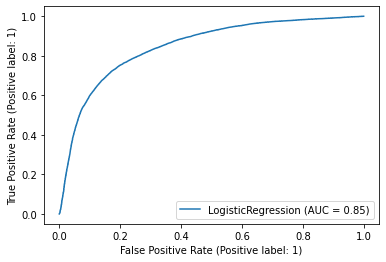

In [124]:

plot_roc_curve(lr, X_tr, y_tr)

plt.show()



## Principal Component Analysis


In [125]:

# import PCA

from sklearn.decomposition import PCA

pca = PCA(random_state=100)

# apply PCA on train data with default parameters

pca.fit(X_tr)


PCA(random_state=100)

In [126]:

X_tr_pca = pca.fit_transform(X_tr)

print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)

print(X_test_pca.shape)


(35320, 48)
(8231, 48)


In [127]:

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

lr_pca = LogisticRegression(C=1e9)

lr_pca.fit(X_tr_pca, y_tr)

# make the predictions on train data

y_pred_train = lr_pca.predict(X_tr_pca)

acc=accuracy_score(y_tr, y_pred_train)

f_1=f1_score(y_tr, y_pred_train)

prec=precision_score(y_tr, y_pred_train)

rec=recall_score(y_tr, y_pred_train)


In [128]:

# Printing confusion matrix

print(confusion_matrix(y_tr,y_pred_train))


[[12525  5135]
 [ 3160 14500]]


In [129]:

print('Accuracy of LR with PCA on train data',acc,'\n')

print('F1 Score of LR with PCA on train data',f_1,'\n')

print('Precision Score of LR with PCA on train data',prec,'\n')

print('Recall Score of PCA LR with on train data',rec)


Accuracy of LR with PCA on train data 0.7651472253680635 

F1 Score of LR with PCA on train data 0.77758412655852 

Precision Score of LR with PCA on train data 0.7384772090654443 

Recall Score of PCA LR with on train data 0.8210645526613817


In [130]:
# Prediction on test set

y_pred_test = lr_pca.predict(X_test_pca)

test_acc =accuracy_score(y_test,y_pred_test)

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.98      0.70      0.82      7548
           1       0.20      0.80      0.32       683

    accuracy                           0.71      8231
   macro avg       0.59      0.75      0.57      8231
weighted avg       0.91      0.71      0.78      8231



In [131]:

print('Accuracy of LR with PCA on test data',test_acc)


Accuracy of LR with PCA on test data 0.7108492285263031


In [132]:

metric_df=pd.DataFrame({'Model':'PCA','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)


In [133]:

col = list(telecom_hv_cust.columns)


In [134]:

df_pca = pd.DataFrame({'PC-1':pca.components_[0],'PC-2':pca.components_[1], 'PC-3':pca.components_[2],'Feature':col})

df_pca.head(10)


,PC-1,PC-2,PC-3,Feature
0,0.196430,0.176387,0.287026,arpu_6
1,0.078846,0.275413,0.032174,onnet_mou_6
2,0.139103,0.297508,0.197801,offnet_mou_6
3,0.435018,-0.027764,-0.175533,roam_ic_mou_6
4,0.463648,-0.040646,-0.183114,roam_ic_mou_7
5,0.510968,0.003441,-0.249565,roam_og_mou_7
6,0.335800,0.005411,-0.141496,roam_og_mou_8
7,0.029842,0.081371,0.130372,loc_og_t2t_mou_6
8,0.051514,0.118535,0.278328,loc_og_t2m_mou_6
9,0.044979,-0.026538,0.180634,loc_og_t2f_mou_6


#### Scree plot to find the optimum value of PCA components


In [135]:

#Cumulative variance explained

var_cumu = np.cumsum(pca.explained_variance_ratio_)


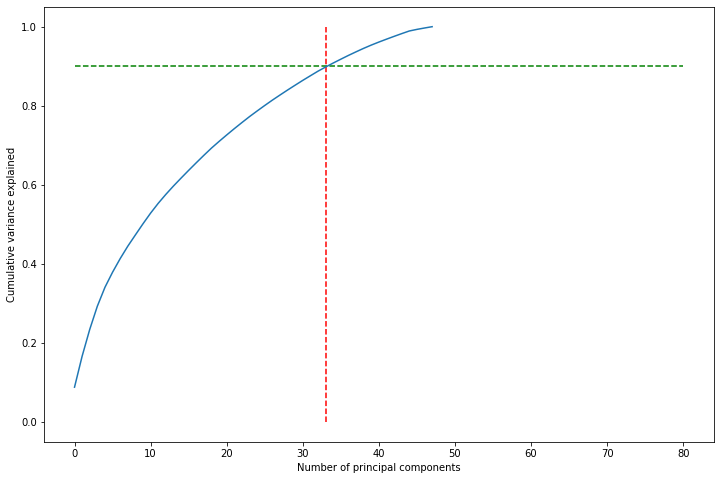

In [136]:

fig = plt.figure(figsize=[12,8])

plt.vlines(x=33, ymax=1, ymin=0, colors="r", linestyles="--")

plt.hlines(y=0.90, xmax=80, xmin=0, colors="g", linestyles="--")

plt.plot(var_cumu)

plt.xlabel('Number of principal components') 

plt.ylabel("Cumulative variance explained")

plt.show()


In [137]:

np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

# 33 columns explains 90% of the variance, lets apply PCA with 33 components


array([ 8.81, 16.64, 23.42, 29.29, 34.07, 37.89, 41.32, 44.46, 47.31,
       50.13, 52.83, 55.3 , 57.56, 59.67, 61.68, 63.64, 65.56, 67.44,
       69.27, 70.96, 72.59, 74.19, 75.73, 77.24, 78.66, 80.05, 81.4 ,
       82.69, 83.96, 85.19, 86.41, 87.58, 88.74, 89.79, 90.8 , 91.77,
       92.72, 93.63, 94.51, 95.33, 96.1 , 96.83, 97.54, 98.23, 98.9 ,
       99.3 , 99.65, 99.98])


## PCA with Optimal Components


In [138]:

pca33 = PCA(n_components=33)

df_tr_pca33 = pca33.fit_transform(X_tr)

print(df_tr_pca33.shape)

df_test_pca33 = pca33.transform(X_test)

print(df_test_pca33.shape)


(35320, 33)
(8231, 33)


In [139]:

# Let's run the model using the selected variables

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

lr_pca1 = LogisticRegression(C=1e9)

lr_pca1.fit(df_tr_pca33, y_tr)

# Prediction on train set
y_pred33_tr = lr_pca1.predict(df_tr_pca33)

acc=accuracy_score(y_tr,y_pred33_tr)

f_1=f1_score(y_tr,y_pred33_tr)

prec=precision_score(y_tr,y_pred33_tr)

rec=recall_score(y_tr,y_pred33_tr)


In [140]:

print('Accuracy of LR with Otimum PCA on train data',acc,'\n')

print('F1 Score of LR with Otimum PCA on train data',f_1,'\n')

print('Precision Score of LR with Otimum PCA on train data',prec,'\n')

print('Recall Score of PCA LR with Otimum PCA on train data',rec)


Accuracy of LR with Otimum PCA on train data 0.7389864099660249 

F1 Score of LR with Otimum PCA on train data 0.7527821726421925 

Precision Score of LR with Otimum PCA on train data 0.714991594926392 

Recall Score of PCA LR with Otimum PCA on train data 0.7947904869762175


In [141]:

# Prediction on test set

y_pred33_test = lr_pca1.predict(df_test_pca33)

test_acc=accuracy_score(y_test,y_pred33_test)

print(classification_report(y_test,y_pred33_test))


              precision    recall  f1-score   support

           0       0.97      0.68      0.80      7548
           1       0.18      0.79      0.30       683

    accuracy                           0.69      8231
   macro avg       0.58      0.73      0.55      8231
weighted avg       0.91      0.69      0.76      8231



In [142]:

print('Accuracy of LR with Otimum PCA on test data',test_acc)


Accuracy of LR with Otimum PCA on test data 0.6900741100716802


In [143]:

metric_df=pd.DataFrame({'Model':'Optimum PCA','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)



## # Decision Tree Classifier


In [144]:

# import decision tree libraries

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

# lets create a decision tree with the default hyper parameters except max depth to make the tree readable

dt1 = DecisionTreeClassifier(max_depth=5)

dt1.fit(X_tr, y_tr)


DecisionTreeClassifier(max_depth=5)

In [145]:

# lets see the classification reort of the model built

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model predictions on train set

y_pred_tr = dt1.predict(X_tr)

acc=accuracy_score(y_tr, y_pred_train)

f_1=f1_score(y_tr, y_pred_train)

prec=precision_score(y_tr, y_pred_train)

rec=recall_score(y_tr, y_pred_train)


In [146]:

print('Accuracy of Decision Tree on train data',acc,'\n')

print('F1 Score ofDecision Tree on train data',f_1,'\n')

print('Precision Score of Decision Tree on train data',prec,'\n')

print('Recall Score of Decision Tree on train data',rec)


Accuracy of Decision Tree on train data 0.7651472253680635 

F1 Score ofDecision Tree on train data 0.77758412655852 

Precision Score of Decision Tree on train data 0.7384772090654443 

Recall Score of Decision Tree on train data 0.8210645526613817


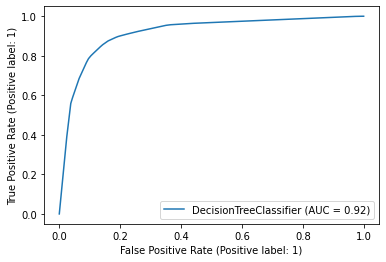

In [147]:

plot_roc_curve(dt1, X_tr, y_tr)

plt.show()


In [148]:

# Model predictions on test set

y_pred_test = dt1.predict(X_test)

test_acc=accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.98      0.83      0.90      7548
           1       0.30      0.78      0.43       683

    accuracy                           0.83      8231
   macro avg       0.64      0.81      0.67      8231
weighted avg       0.92      0.83      0.86      8231



In [149]:

print('Accuracy of Decision Tree on test data',test_acc)


Accuracy of Decision Tree on test data 0.8288178836107399


In [150]:

metric_df=pd.DataFrame({'Model':'DT','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)



## Hyperparameter tuning on Decision Tree Classifier


In [151]:

# GridSearchCV for hyperparameter tuning

from sklearn.model_selection import GridSearchCV


In [152]:

dt1 = DecisionTreeClassifier()

# Range of hyperparameters

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    
}
grid_search = GridSearchCV(estimator=dt1,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


In [153]:

%%time

grid_search.fit(X_tr, y_tr)


Fitting 4 folds for each of 30 candidates, totalling 120 fits
CPU times: user 2.39 s, sys: 245 ms, total: 2.63 s
Wall time: 46.2 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [154]:

grid_search.best_score_


0.8926387315968289

In [155]:

grid_search.best_estimator_


DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)

In [156]:

dt_best = grid_search.best_estimator_

# Build the model on optimal parameters

dt_best.fit(X_tr, y_tr)


DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)

In [157]:

# Prediction on train set

y_pred_tr = dt_best.predict(X_tr)

acc=accuracy_score(y_tr, y_pred_train)

f_1=f1_score(y_tr, y_pred_train)

prec=precision_score(y_tr, y_pred_train)

rec=recall_score(y_tr, y_pred_train)


In [158]:

print('Accuracy of Hyperparameter tuned Decision Tree on train data',acc,'\n')

print('F1 Score of Hyperparameter tuned Decision Tree on train data',f_1,'\n')

print('Precision Score of Hyperparameter tuned Decision Tree on train data',prec,'\n')

print('Recall Score of Hyperparameter tuned Decision Tree on train data',rec)


Accuracy of Hyperparameter tuned Decision Tree on train data 0.7651472253680635 

F1 Score of Hyperparameter tuned Decision Tree on train data 0.77758412655852 

Precision Score of Hyperparameter tuned Decision Tree on train data 0.7384772090654443 

Recall Score of Hyperparameter tuned Decision Tree on train data 0.8210645526613817


In [159]:

# Model predictions on test set

y_pred_test = dt_best.predict(X_test)

test_acc = accuracy_score(y_test, y_pred_test)

# classification report

print(classification_report(y_tr, y_pred_tr))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96     17660
           1       0.96      0.96      0.96     17660

    accuracy                           0.96     35320
   macro avg       0.96      0.96      0.96     35320
weighted avg       0.96      0.96      0.96     35320



In [160]:

print('Accuracy of Hyperparameter tuned Decision Tree on test data',test_acc)


Accuracy of Hyperparameter tuned Decision Tree on test data 0.8630786052727494


In [161]:

metric_df=pd.DataFrame({'Model':'Tuned DT','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)



## Random Forest Classifier


In [162]:

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=42)

rf=rf.fit(X_tr,y_tr)


In [163]:

# Prediction on train set

y_pred_tr = rf.predict(X_tr)

acc=accuracy_score(y_tr, y_pred_tr)

f_1=f1_score(y_tr, y_pred_tr)

prec=precision_score(y_tr, y_pred_tr)

rec=recall_score(y_tr, y_pred_tr)

# classification report

print(classification_report(y_tr, y_pred_tr))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17660
           1       1.00      1.00      1.00     17660

    accuracy                           1.00     35320
   macro avg       1.00      1.00      1.00     35320
weighted avg       1.00      1.00      1.00     35320



In [164]:

print('Accuracy of Random Forest on train data',acc,'\n')

print('F1 Score of Random Forest on train data',f_1,'\n')

print('Precision Score of Random Forest on train data',prec,'\n')

print('Recall Score of Random Forest on train data',rec)


Accuracy of Random Forest on train data 1.0 

F1 Score of Random Forest on train data 1.0 

Precision Score of Random Forest on train data 1.0 

Recall Score of Random Forest on train data 1.0


In [165]:

# Model predictions on test set

y_pred_test = rf.predict(X_test)

test_acc=accuracy_score(y_test, y_pred_test)

# classification report

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7548
           1       0.48      0.55      0.51       683

    accuracy                           0.91      8231
   macro avg       0.72      0.75      0.73      8231
weighted avg       0.92      0.91      0.92      8231



In [166]:

print('Accuracy of Random Forest on test data',test_acc)


Accuracy of Random Forest on test data 0.9133762604786781


In [167]:

metric_df=pd.DataFrame({'Model':'RF','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)



## Hyperparameter tuning on Random Forest Classifier


In [168]:

# Range of hyperparameters

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}


In [169]:

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")


In [ ]:

%%time

grid_search.fit(X_tr, y_tr)


Fitting 4 folds for each of 120 candidates, totalling 480 fits


In [ ]:

grid_search.best_score_


In [ ]:

rf_best = grid_search.best_estimator_

rf_best


In [ ]:
# Build final model on best estimator of Grid search CV

rf_best.fit(X_tr,y_tr)

y_pred_tr = rf_best.predict(X_tr)

acc=accuracy_score(y_tr, y_pred_tr)

f_1=f1_score(y_tr, y_pred_tr)

prec=precision_score(y_tr, y_pred_tr)

rec=recall_score(y_tr, y_pred_tr)


In [ ]:

print('Accuracy of Hyperparameter tuned Random Forest on train data',acc,'\n')

print('F1 Score of Hyperparameter tuned Random Forest on train data',f_1,'\n')

print('Precision Score of Hyperparameter tuned Random Forest on train data',prec,'\n')

print('Recall Score of Hyperparameter tuned Random Forest on train data',rec)


In [ ]:

# ROC Curve

plot_roc_curve(rf, X_tr, y_tr)

plt.show()


In [ ]:
# Prediction on test set

y_pred_test = rf_best.predict(X_test)

test_acc=accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))


In [ ]:

print('Accuracy of Hyperparameter tuned Random Forest on test data',test_acc)


In [ ]:

metric_df=pd.DataFrame({'Model':'Tuned RF','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)



## XGBoost Classifier


In [ ]:

# Build the XGBoost model

from xgboost import XGBClassifier

xgbclf=XGBClassifier()

xgbclf.fit(X_tr, y_tr)


In [ ]:

# Prediction on train set

y_pred_tr=xgbclf.predict(X_tr)

acc=accuracy_score(y_tr, y_pred_tr)

f_1=f1_score(y_tr, y_pred_tr)

prec=precision_score(y_tr, y_pred_tr)

rec=recall_score(y_tr, y_pred_tr)


In [ ]:

print('Accuracy of XGBoost on train data',acc,'\n')

print('F1 Score of XGBoost on train data',f_1,'\n')

print('Precision Score of XGBoost on train data',prec,'\n')

print('Recall Score of XGBoost on train data',rec)


In [ ]:
# Prediction on test set

y_pred_test=xgbclf.predict(X_test)

test_acc=accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))


In [ ]:

print('Accuracy of XGBoost on test data',test_acc)


In [ ]:

metric_df=pd.DataFrame({'Model':'XGB','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)


In [ ]:

print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_tr,
                                                              y_score=xgbclf.predict_proba(X_tr)[:, 1]))


## Hyperparameter tuning with XGBoost Classifier


In [ ]:

# Creating KFold object 

folds = 5

# Range of hyperparameters

param_grid = {'learning_rate': [0.1,0.2,0.3], 
             'subsample': [0.3,0.4,0.5]}          


# Select the model

xgb_model = XGBClassifier()

# set up GridSearchCV()

model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', # accuracy
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)      



In [ ]:

# Fit the model

model_cv.fit(X_tr, y_tr)     


In [ ]:

# Model best score by GridSearch CV

model_cv.best_score_


In [ ]:
# Build final model on best estimator of Grid search CV

xgb_best=model_cv.best_estimator_


In [ ]:
# Fit the optimum XGB model

xgb_best.fit(X_tr, y_tr)


In [ ]:

# Prediction on train set

y_pred_tr = xgb_best.predict(X_tr)

acc=accuracy_score(y_tr, y_pred_tr)

f_1=f1_score(y_tr, y_pred_tr)

prec=precision_score(y_tr, y_pred_tr)

rec=recall_score(y_tr, y_pred_tr)


In [ ]:

print('Accuracy of Hyperparameter tuned XGBoost on train data',acc,'\n')

print('F1 Score of Hyperparameter tuned XGBoost on train data',f_1,'\n')

print('Precision Score of Hyperparameter tuned XGBoost on train data',prec,'\n')

print('Recall Score of Hyperparameter tuned XGBoost on train data',rec)


In [ ]:

plot_roc_curve(xgb_best, X_tr, y_tr)

plt.show()


In [ ]:
# Prediction on test set

y_pred_test=xgbclf.predict(X_test)

test_acc=accuracy_score(y_test, y_pred_test)

print(classification_report(y_test, y_pred_test))


In [ ]:

print('Accuracy of hyperparameter tuned XGBoost on test data',test_acc)


In [ ]:

metric_df=pd.DataFrame({'Model':'Tuned XGB','Train Accuracy':acc,'Recall':rec,'Precision':prec,'F1_Score':f_1,'Test Accuracy':test_acc},index=[0])

metric_df_final=metric_df_final.append(metric_df,ignore_index=True)



## The Final Score Card for different Models:


In [ ]:

metric_df_final.round(4)



# Conclusions

- ### Decrease in Total data recharge amount and Maximum recharge amount in month 8 is a strong indicator of churn.

- ### Decrease in 2G usage for Month 8 shows an increase trend of churn.

- ### Decrease in incoming and outgoing special calls in month 8 shows high churn probability.

- ### In general overall decrease in all kind of outgoing calls indicates a potential churn.

- ### New customers tend to churn easily.

- ### XGBoost and Random Forest produced the best prediction scores.

- ### Logistic Regression with SMOTE balancing produced the best interpretable model with 29 variables.
